In [ ]:
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

from matplotlib.pyplot import imread
from sklearn.tree import export_graphviz
import pandas as pd
import graphviz
import pydotplus
import io
from scipy import misc

%matplotlib inline



In [ ]:
data=pd.read_csv('/content/data.csv')

In [ ]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']
pos_dance = data[data['target'] == 1]['danceability']
neg_dance = data [data['target' ] == 0] [ 'danceability' ]
pos_duration = data[data['target'] == 1] ['duration_ms' ]
neg_duration = data[data['target'] == 0]['duration_ms']
pos_loudness = data[data[ 'target' ] == 1] [ 'loudness' ]
neg_loudness = data[data[ 'target'] == 0] [ 'loudness' ]
pos_speechiness = data[data[ 'target' ] == 1] [ 'speechiness' ]
neg_speechiness = data[data[ 'target' ] == 0] [ 'speechiness' ]
pos_valence = data[data[ 'target' ] == 1] ['valence' ]
neg_valence = data[data['target'] == 0] ['valence']
pos_energy = data[data[ 'target' ] == 1] ['energy' ]
neg_energy = data[data[ 'target' ] == 0] ['energy' ]
pos_acousticness = data[data[ 'target' ] == 1] [ 'acousticness' ]
neg_acousticness = data[data[ 'target' ] == 0] [ 'acousticness' ]
pos_key = data [data[ 'target' ] == 1] ['key' ]
neg_key = data [data [ 'target' ] == 0] ['key' ]
pos_instrumentalness = data [data[ 'target'] == 1] ['instrumentalness' ]
neg_instrumentalness = data[data[ 'target' ] == 0] ['instrumentalness' ]


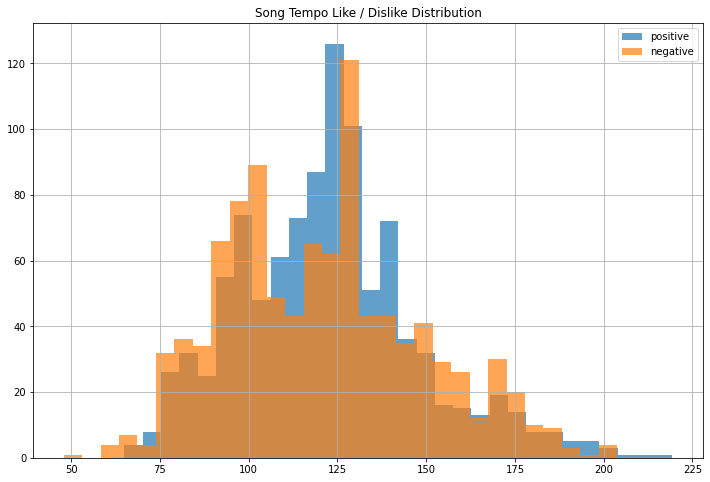

In [ ]:
fig = plt. figure(figsize=(12, 8) )
plt. title("Song Tempo Like / Dislike Distribution")
pos_tempo . hist (alpha = 0.7, bins = 30, label='positive' )
neg_tempo . hist (alpha = 0.7, bins = 30, label='negative' )
plt.legend(loc = "upper right")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes cu

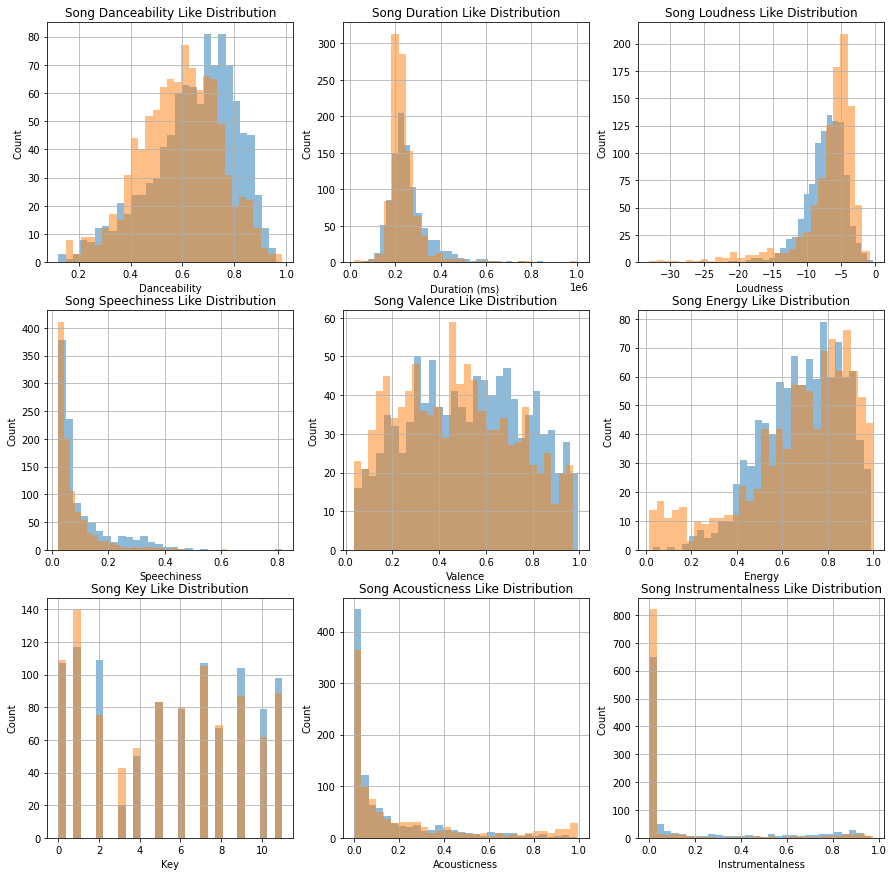

In [ ]:



fig2 = plt. figure(figsize=(15, 15))
# Danceability
ax3 = fig2. add_subplot(331)
ax3. set_xlabel ( 'Danceability' )
ax3. set_ylabel ( 'Count ' )
ax3. set_title( 'Song Danceability Like Distribution' )
pos_dance.hist(alpha=0.5, bins=30)
ax4 = fig2. add_subplot (331)
neg_dance. hist (alpha=0.5, bins=30)

# Duration
ax5 = fig2. add_subplot (332)
pos_duration. hist (alpha=0.5, bins=30)
ax5. set_xlabel ( 'Duration (ms) ' )
ax5. set_ylabel ( 'Count ' )
ax5. set_title("Song Duration Like Distribution")
ax6 = fig2. add_subplot (332)
neg_duration. hist (alpha=0.5, bins=30)

# Loudness
ax7 = fig2. add_subplot(333)
pos_loudness . hist (alpha=0.5, bins=30)
ax7. set_xlabel ( 'Loudness ' )
ax7 . set_ylabel ( 'Count' )
ax7. set_title("Song Loudness Like Distribution")
ax8 = fig2. add_subplot (333)
neg_loudness . hist (alpha=0.5, bins=30)

# Speechiness
ax9 = fig2. add_subplot (334)
pos_speechiness . hist (alpha=0.5, bins=30)
ax9. set_xlabel ( 'Speechiness' )
ax9. set_ylabel ( 'Count' )
ax9. set_title("Song Speechiness Like Distribution")
ax10 = fig2. add_subplot (334)
neg_speechiness . hist (alpha=0.5, bins=30)

# Valence
ax11 = fig2. add_subplot (335)
pos_valence. hist (alpha=0.5, bins=30)
ax11. set_xlabel ( 'Valence' )
ax11. set_ylabel ( 'Count' )

ax11. set_title("Song Valence Like Distribution")
ax12 = fig2. add_subplot (335)
neg_valence. hist (alpha=0.5, bins=30)

# Energy
ax13 = fig2. add_subplot (336)
pos_energy . hist (alpha=0.5, bins=30)
ax13. set_xlabel ( 'Energy' )
ax13. set_ylabel ( 'Count ' )
ax13. set_title("Song Energy Like Distribution")
ax14 = fig2. add_subplot (336)
neg_energy . hist (alpha=0.5, bins=30)

# Key
ax15 = fig2. add_subplot (337)
pos_key . hist (alpha=0.5, bins=30)
ax15. set_xlabel ( 'Key')
ax15. set_ylabel ( 'Count' )
ax15. set_title("Song Key Like Distribution")
ax15 = fig2. add_subplot (337)
neg_key . hist (alpha=0.5, bins=30)

# Acousticness
ax16 = fig2. add_subplot (338)
pos_acousticness . hist (alpha=0.5, bins=30)
ax16. set_xlabel ( 'Acousticness' )
ax16. set_ylabel ( 'Count' )
ax16. set_title("Song Acousticness Like Distribution")
ax16 = fig2. add_subplot (338)
neg_acousticness . hist (alpha=0.5, bins=30)

# Instrumentalness
ax17 = fig2. add_subplot (339)
pos_instrumentalness. hist (alpha=0.5, bins=30)
ax17 . set_xlabel ( 'Instrumentalness' )
ax17 . set_ylabel ( 'Count ' )
ax17. set_title("Song Instrumentalness Like Distribution")
ax17 = fig2.add_subplot(339)
neg_instrumentalness. hist (alpha=0.5, bins=30)



In [ ]:
c = DecisionTreeClassifier (min_samples_split=100)
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'target', 'time_signature', 'valence']


X_train=train[features]
y_train=train["target"]

X_test=test[features]
y_test=test["target"]

dt = c.fit(X_train, y_train)


In [ ]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file = f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imread(path)
    plt.rcParams['figure.figsize'] = (20, 20)
    plt.imshow(img)
  

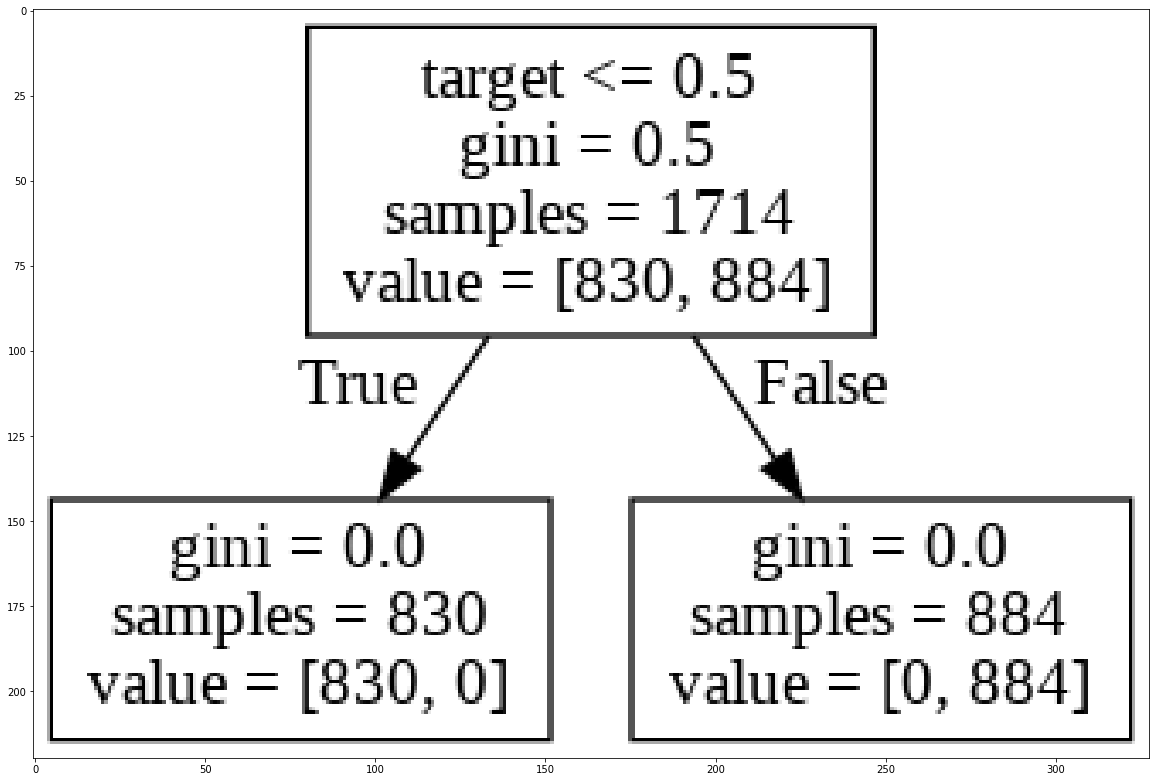

In [ ]:
show_tree(dt, features, 'dec_tree_01.png')

In [ ]:
y_pred = c.predict(X_test)

y_pred

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred) * 100

In [ ]:
print ("Accuracy using Decision Tree: ", round(score, 1), "%")

Accuracy using Decision Tree:  100.0 %
